#Credit Card Fraud Detection with ML Algorithms

In this project, we will use the credit card transactions data to build machine learning models for predicting credit card fraud. We will explore the data in detail and build models which can classify fraud and non-fraudulent cases.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

##Dataset
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numeric input variables which are the result of a PCA transformation. Due to confidentiality issues, they have not provided the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are Time and Amount.

Feature Time contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature Amount is the transaction Amount, this feature can be used for example-dependent cost-sensitive learning. Feature Class is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [13]:
# Load the dataframe from the csv file
def load_data():
    df = pd.read_csv('/content/creditcard data.csv')

    # First 10 rows
    print("")
    print("First 10 rows:")
    print(df.head(10))

    # Shape of the dataframe
    print("")
    print("Shape: ", df.shape)

    # Sum of null values
    print("")
    print("Sum of NaN values: ", df.isna().sum())

    # Type of the dataset
    print("")
    print("Type: ", df.dtypes)

    # Description of the dataset
    print("")
    print("Description: ")
    print(df.describe())

    # Count of classes
    print("")
    print("classes count: ", df['Class'].value_counts())

    return df

df = load_data()


First 10 rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698 

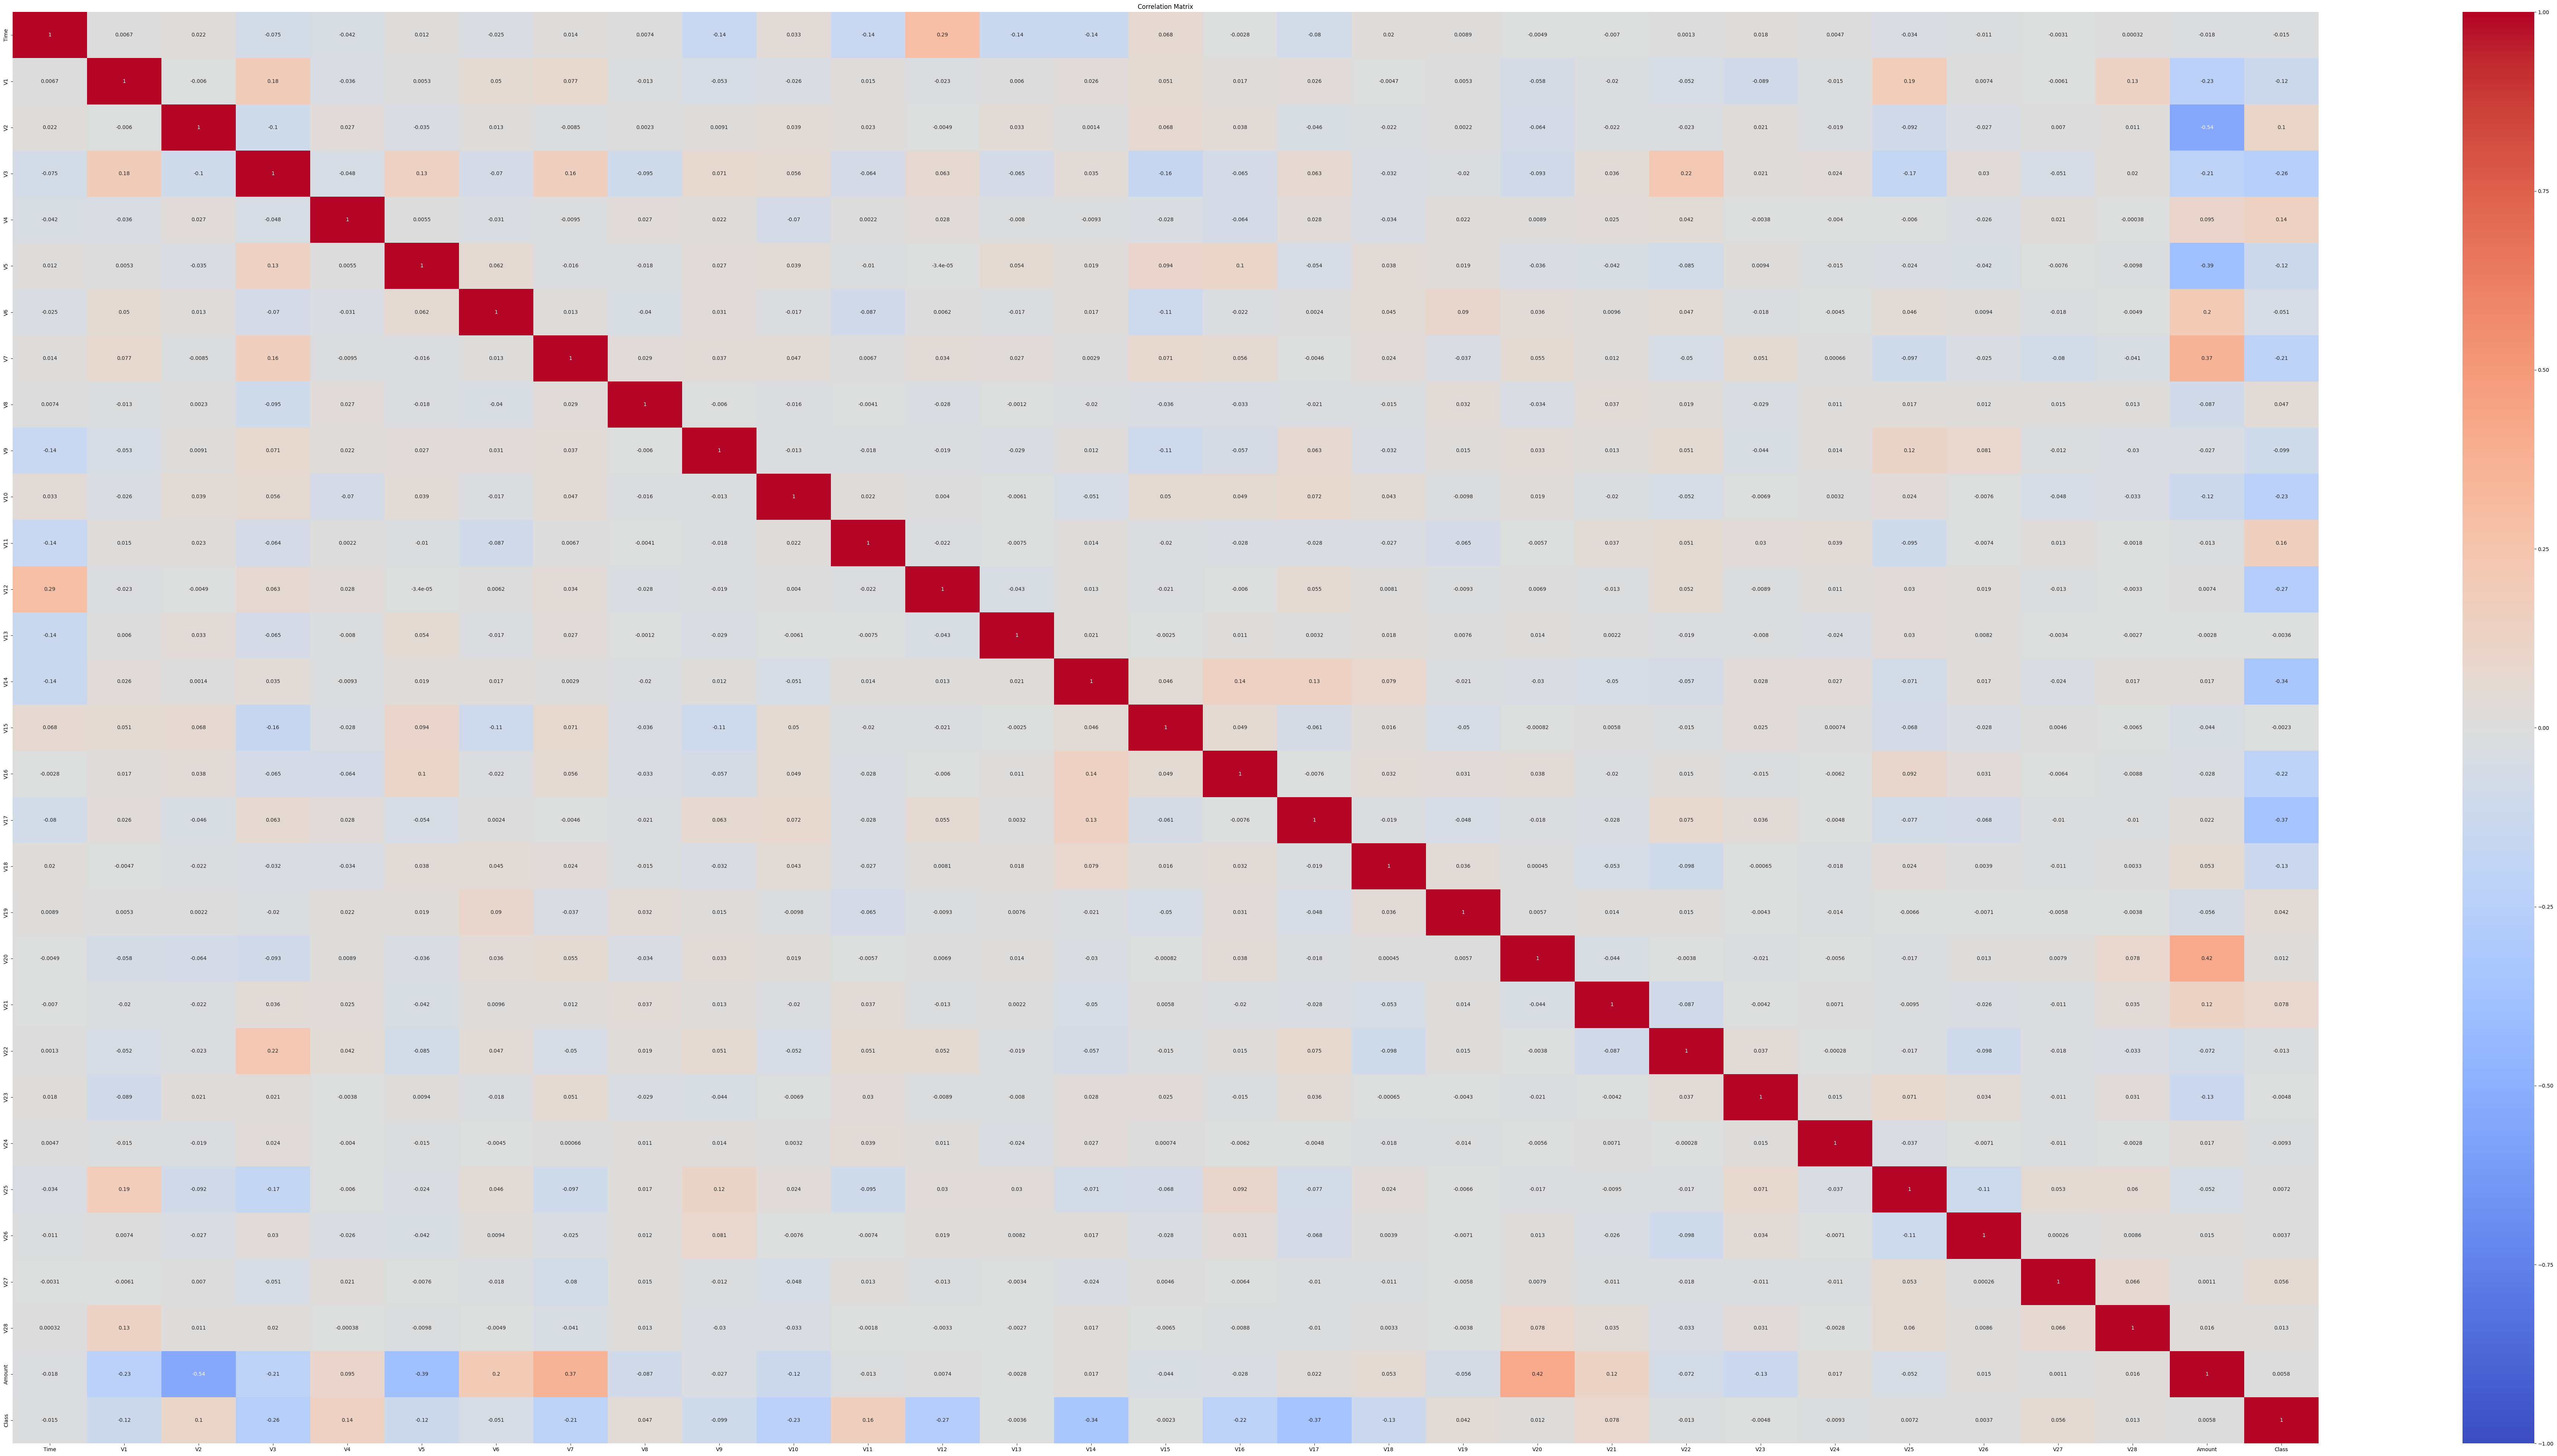

<Axes: title={'center': 'Correlation Matrix'}>

In [14]:
# Plot correlation matrix for the dataset and return the plot and correlation data
def corr_matrix(df):
    # Select numeric features
    numeric_features = df.select_dtypes(include=['float64', 'int64'])
    corr_data = numeric_features.corr()

    # Plot the correlation matrix using seaborn
    plt.figure(figsize=(100, 50))
    g = sns.heatmap(corr_data, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix')
    plt.show()

    return g

corr_matrix(df)


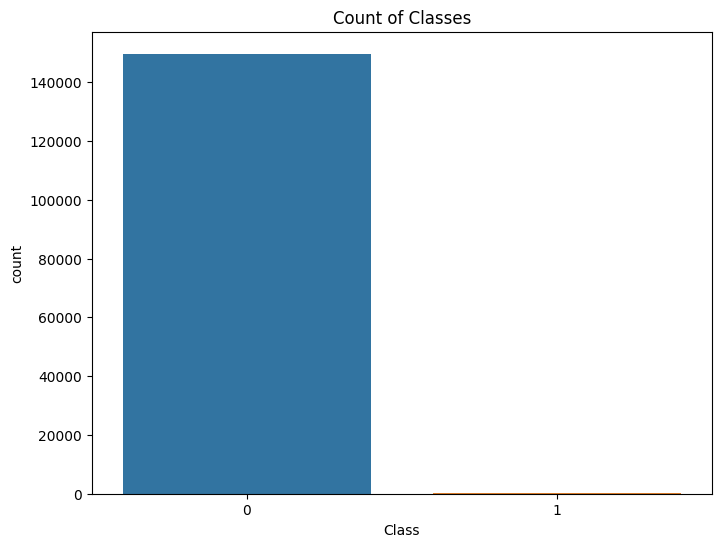

<Figure size 800x600 with 0 Axes>

In [15]:
# Plot using countplot on target 'Class' variable
def plot_target_count(df):
    # Plot the countplot
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x='Class', data=df)
    plt.figure(figsize=(8, 6))
    ax.set_title('Count of Classes')
    plt.show()

plot_target_count(df)


##Feature Engineering & Dataset Splits

Feature scaling in a data science project refers to the process of transforming the values of different features to a common scale, which helps to improve the performance of machine learning models.

Target class balancing using SMOTE (Synthetic Minority Over-sampling Technique) in a data science project is a resampling technique used to address class imbalance in a dataset. SMOTE generates synthetic samples of the minority class by interpolating between existing samples, effectively creating a more balanced distribution of the target variable.

In [39]:
from re import X
# Process the dataset
def process_data(df):
    # Feature Scaling needs to be done for "Amount" column in our dataset
    scaler = StandardScaler()
    df['Amount'] = scaler.fit_transform(df[['Amount']])

    # Drop the 'Time' column
    df = df.drop(['Time'], axis=1)

    # Drop the duplicate rows
    df = df.drop_duplicates()

    # Split the dataset into features and target
    X = df.drop(['Class'], axis=1)
    y = df['Class']

    # Re-balance the dataset
    smote = SMOTE(random_state=42)
    X, y = smote.fit_resample(X, y)

    # Splite the dataset
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=4)

    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = process_data(df)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(232131, 29)
(232131,)
(58033, 29)
(58033,)


##Train the Machine Learning Models



###Fit in Logistic Regression Model
Logistic regression is a type of machine learning model that is commonly used for classification problems, where the goal is to predict a binary outcome (such as "yes" or "no") based on input data.

In [41]:
def fit_logistic_regression(X_train, X_test, Y_train, Y_test):
    # Initialize the model
    lr = LogisticRegression(max_iter=1000, random_state=42)

    # Fit the model to the training data
    lr.fit(X_train, Y_train)

    # Use cross-validation to get the model's performance
    scores = cross_val_score(lr, X_test, Y_test, cv=5, scoring='accuracy')

    # Calculate the mean and standard deviation of the scores
    mean_score = scores.mean()
    std_score = scores.std()
    return ('Logistic Regression', mean_score, std_score)

# Get the model's performance
logistic_regression_result = fit_logistic_regression(X_train, X_test, Y_train, Y_test)
print(logistic_regression_result)


('Logistic Regression', 0.9546464849503353, 0.0018268452017148097)


### Linear Discriminant Analysis (LDA)

Linear Discriminant Analysis (LDA) is a supervised machine learning algorithm that is commonly used for classification problems. It is particularly useful when there are more than two classes to predict, and it works by finding a linear combination of features that separates the classes as much as possible.

In [42]:
def fit_lda(X_train, X_test, Y_train, Y_test):
    # Initialize the LDA model
    lda = LDA()

    # Fit the model on training data
    lda.fit(X_train, Y_train)

    # Use cross-validation to get the mean and standard deviation of the model's performance
    scores = cross_val_score(lda, X_train, Y_train, cv=5)  # 5-fold cross-validation

    mean_score = scores.mean()
    std_score = scores.std()
    return ('Linear Discriminant Analysis',  mean_score, std_score)

# Get the model's performance
lda_result = fit_lda(X_train, X_test, Y_train, Y_test)
print(lda_result)

('Linear Discriminant Analysis', 0.9182056572659409, 0.0015869368202136233)


###Gaussian Naive Bayes (GNB)

Gaussian Naive Bayes (GNB) is a machine learning algorithm that is commonly used for classification problems. It works by calculating the probability of each class given the input features, and then selecting the class with the highest probability as the predicted class

In [43]:
def fit_gaussian_nb(X_train, X_validation, Y_train, Y_validation):
    # Initialize the GNB model
    gnb = GaussianNB()

    # Fit the model on training data
    gnb.fit(X_train, Y_train)

    # Use cross-validation to get the mean and standard deviation of the model's performance
    scores = cross_val_score(gnb, X_train, Y_train, cv=5)  # 5-fold cross-validation

    mean_score = scores.mean()
    std_score = scores.std()
    return ('Gaussian Naive Bayes', mean_score, std_score)

# Get the model's performance
gnb_result = fit_gaussian_nb(X_train, X_test, Y_train, Y_test)
print(gnb_result)


('Gaussian Naive Bayes', 0.9132774048218841, 0.0016638925254451667)


##Model Selection & Evaluation

In [47]:
def select_model(X_train, X_test, Y_train, Y_test):
    lr = fit_logistic_regression(X_train, X_test, Y_train, Y_test)
    lda = fit_lda(X_train, X_test, Y_train, Y_test)
    gnb = fit_gaussian_nb(X_train, X_test, Y_train, Y_test)

    model_mean_values = {
        "lr": lr[1],
        "lda": lda[1],
        "gnb": gnb[1]
    }

    best_mean_model = min(model_mean_values, key=model_mean_values.get)

    return best_mean_model


def evaluate_model():
    # Get the best model
    best_model = select_model(X_train, X_test, Y_train, Y_test)
    print("best_model: ", best_model)
    if best_model == "lr":
        best_model = LogisticRegression(max_iter=1000, random_state=42)
    elif best_model == "lda":
        best_model = LDA()
    elif best_model == "gnb":
        best_model = GaussianNB()
    else:
        print("Error")
        return

    # Fit the model on the training data
    best_model.fit(X_train, Y_train)

    # Make predictions on the testing data
    y_pred = best_model.predict(X_test)

    # Calculate the accuracy score
    accuracy = accuracy_score(Y_test, y_pred)

    # Calculate the confusion matrix
    cm = confusion_matrix(Y_test, y_pred)

    # Calculate the classification report
    cr = classification_report(Y_test, y_pred)

    return accuracy, cm, cr

accuracy, cm, cr = evaluate_model()
print("accuracy: ", accuracy)
print("confusion matrix: ")
print(cm)
print("classification report: ")
print(cr)



best_model:  gnb
accuracy:  0.9142729136870401
confusion matrix: 
[[28432   683]
 [ 4292 24626]]
classification report: 
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     29115
           1       0.97      0.85      0.91     28918

    accuracy                           0.91     58033
   macro avg       0.92      0.91      0.91     58033
weighted avg       0.92      0.91      0.91     58033



In [49]:
def predict_model():
    data = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]  ## thal_2, thal_3, slope_0, slope_1, slope_2

    # Fit the  best model on the training data
    # Get the best model
    best_model = select_model(X_train, X_test, Y_train, Y_test)
    print("best_model: ", best_model)
    if best_model == "lr":
        best_model = LogisticRegression(max_iter=1000, random_state=42)
    elif best_model == "lda":
        best_model = LDA()
    elif best_model == "gnb":
        best_model = GaussianNB()
    else:
        print("Error")
        return

    # Fit the model on the training data
    best_model.fit(X_train, Y_train)

    # Make a prediction on the new data using the your model
    prediction = best_model.predict(data)

    # Return the predicted class label
    return prediction

prediction = predict_model()
print("Prediction result: ", prediction)

best_model:  gnb
Prediction result:  [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
